# Simple and Multiple Linear Regression with scikit-learn

In this Jupyter Notebook, we will explore how to perform simple and multiple linear regression using scikit-learn, a popular Python library for machine learning. We will use a diabetes dataset provided by scikit-learn to demonstrate how to build, train, and evaluate linear regression models.

To start, we will load the diabetes dataset and inspect its features and target variable. Then, we will split the dataset into training and testing sets to assess the performance of our models. We will use scikit-learn's linear regression models to fit the training data and make predictions on the testing data. We will also evaluate the models' performance using mean squared error (MSE) and R-squared (R^2) metrics.

For simple linear regression, we will use scikit-learn's `LinearRegression` class to fit a linear model with one feature. For multiple linear regression, we will use the same class to fit a linear model with several features. We will also use scikit-learn's `PolynomialFeatures` class to create additional features by transforming the original features.

We will visualize the relationships between the features and the target variable using scatter plots and regression lines. We will also plot the residuals to check for any patterns or heteroscedasticity.

By the end of this notebook, you will have a solid understanding of how to perform simple and multiple linear regression with scikit-learn and how to evaluate the models' performance using common metrics. You will also be able to create visualizations to help interpret and communicate your results. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the diabetes dataset from scikit-learn
diabetes = load_diabetes()

# Convert the dataset into a Pandas DataFrame
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
target = pd.DataFrame(diabetes.target, columns=['target'])
diabetes_df = pd.concat([data, target], axis=1)

# Split the data into training and testing sets
# We use 80% of the data for training and 20% for testing
# We also set a random seed to ensure reproducibility of the results
(X_train, X_test, y_train, y_test) = train_test_split(data, target, test_size=0.2, random_state=0)
X_train 


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
74,0.012648,0.050680,0.002417,0.056301,0.027326,0.017162,0.041277,-0.039493,0.003712,0.073480
26,-0.107226,-0.044642,-0.077342,-0.026328,-0.089630,-0.096198,0.026550,-0.076395,-0.042572,-0.005220
45,0.027178,0.050680,-0.035307,0.032201,-0.011201,0.001504,-0.010266,-0.002592,-0.014956,-0.050783
389,-0.005515,0.050680,0.001339,-0.084857,-0.011201,-0.016658,0.048640,-0.039493,-0.041180,-0.088062
154,0.067136,0.050680,0.020739,-0.005671,0.020446,0.026243,-0.002903,-0.002592,0.008640,0.003064
...,...,...,...,...,...,...,...,...,...,...
323,0.070769,0.050680,-0.007284,0.049415,0.060349,-0.004445,-0.054446,0.108111,0.129019,0.056912
192,0.056239,0.050680,-0.030996,0.008101,0.019070,0.021233,0.033914,-0.039493,-0.029528,-0.059067
117,0.059871,-0.044642,-0.021295,0.087287,0.045213,0.031567,-0.047082,0.071210,0.079121,0.135612
47,-0.078165,-0.044642,-0.073030,-0.057314,-0.084126,-0.074277,-0.024993,-0.039493,-0.018118,-0.083920


Simple Linear Regression

R-squared (BMI): 0.19057346847560164


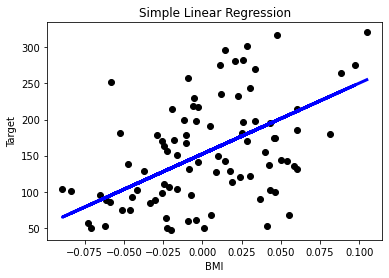

In [ ]:
# Simple Linear Regression

# Select one feature (BMI) for the independent variable
# We reshape the arrays to ensure that they have the correct shape
X_train_bmi = X_train['bmi'].values.reshape(-1, 1)
X_test_bmi = X_test['bmi'].values.reshape(-1, 1)

# Create a LinearRegression object
lr_bmi = LinearRegression()

# Fit the model to the training data
lr_bmi.fit(X_train_bmi, y_train)

# Calculate the R-squared score on the testing data
r2_bmi = lr_bmi.score(X_test_bmi, y_test)

# Print the R-squared score for the simple linear regression
print('R-squared (BMI):', r2_bmi)

# Plot the data and the regression line for the simple linear regression
plt.scatter(X_test_bmi, y_test, color='black')
plt.plot(X_test_bmi, lr_bmi.predict(X_test_bmi), color='blue', linewidth=3)
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Simple Linear Regression')
plt.show()



# Multiple Linear Regression

R-squared (All features): 0.33222203269065176


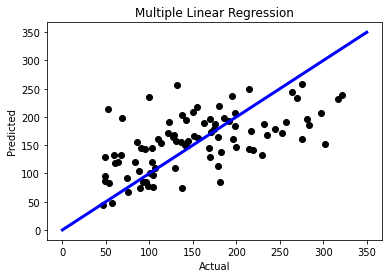

In [ ]:


# Create a LinearRegression object
lr_all = LinearRegression()

# Fit the model to the training data
lr_all.fit(X_train, y_train)

# Calculate the R-squared score on the testing data
r2_all = lr_all.score(X_test, y_test)

# Print the R-squared score for the multiple linear regression
print('R-squared (All features):', r2_all)

# Plot the actual vs predicted target values for the multiple linear regression
plt.scatter(y_test, lr_all.predict(X_test), color='black')
plt.plot([0, 350], [0, 350], color='blue', linewidth=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression')
plt.show()


#Visualiztiing The difference

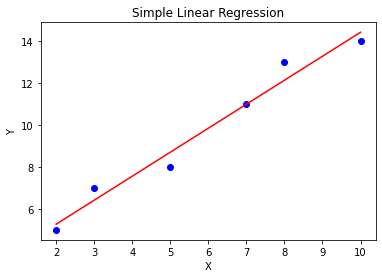

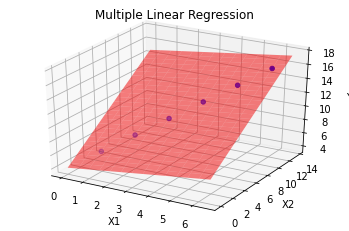

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample data
x_slr = np.array([2, 3, 5, 7, 8, 10]).reshape(-1, 1)
y_slr = np.array([5, 7, 8, 11, 13, 14]).reshape(-1, 1)

x_mlr = np.array([[1, 2], [2, 4], [3, 6], [4, 8], [5, 10], [6, 12]])
y_mlr = np.array([6, 8, 10, 12, 14, 16]).reshape(-1, 1)

# Fit simple linear regression
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_slr, y_slr)

# Fit multiple linear regression
mlr = LinearRegression()
mlr.fit(x_mlr, y_mlr)

# Visualize simple linear regression
plt.scatter(x_slr, y_slr, color='blue')
plt.plot(x_slr, slr.predict(x_slr), color='red')
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Visualize multiple linear regression
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_mlr[:, 0], x_mlr[:, 1], y_mlr, color='blue')

# Create a meshgrid for the x and y values
x_mesh, y_mesh = np.meshgrid(np.arange(0, 7, 0.5), np.arange(0, 14, 0.5))

# Flatten the meshgrid values for prediction
x_flattened = np.ravel(x_mesh)
y_flattened = np.ravel(y_mesh)

# Make predictions on the meshgrid values
z = np.array([mlr.predict([[x, y]])[0, 0] for x, y in zip(x_flattened, y_flattened)]).reshape(x_mesh.shape)

# Plot the plane
ax.plot_surface(x_mesh, y_mesh, z, color='red', alpha=0.5)

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.title("Multiple Linear Regression")
plt.show()


#Ordinary Least Squares

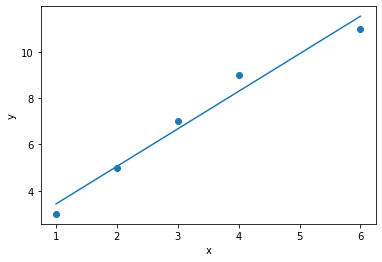

Estimated coefficients: [1.62162162 1.81081081]
R^2 value: 0.972972972972973


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
x = np.array([1, 2, 3, 4, 6])
y = np.array([3, 5, 7, 9, 11])

# Add a column of ones to x to represent the intercept term
X = np.vstack([x, np.ones(len(x))]).T

# Compute the coefficients using OLS
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Compute the predicted values using the estimated coefficients
y_hat = X @ beta_hat

# Compute the residual sum of squares (RSS) and the total sum of squares (TSS)
RSS = np.sum((y - y_hat)**2)
TSS = np.sum((y - np.mean(y))**2)

# Compute the coefficient of determination (R^2)
R_squared = 1 - (RSS / TSS)

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_hat)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Print the estimated coefficients and the R^2 value
print('Estimated coefficients:', beta_hat)
print('R^2 value:', R_squared)


#R-squared score
The coefficient of determination (R-squared) is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In other words, it measures how well the regression line (or plane, in the case of multiple regression) fits the data.

The R-squared score is a value between 0 and 1, where 0 indicates that the regression line does not fit the data at all (i.e., the model explains none of the variability in the dependent variable), and 1 indicates that the regression line perfectly fits the data (i.e., the model explains all of the variability in the dependent variable). However, it is important to note that an R-squared value of 1 does not necessarily mean that the model is a good fit, as it may have overfit the data.

##Interpretation of R-squared scores
In general, a higher R-squared score indicates a better fit of the model to the data. However, the interpretation of the R-squared score depends on the context of the problem and the nature of the data. For example, in some cases, an R-squared value of 0.7 may be considered good, while in other cases, a value of 0.9 may be required.

It is also important to consider other factors when interpreting the R-squared score, such as the number of independent variables, the sample size, the distribution of the residuals, and the assumptions of the regression model. These factors can affect the reliability and validity of the model, and should be taken into account when interpreting the R-squared score.